In [52]:
import os
import pandas as pd
import numpy as np
import pyodbc
import matplotlib.pyplot as plt

In [2]:
import pyodbc
# Download sql_data
def download_mgra_denorm_data(geo_level):
    conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                    'Server=DDAMWSQL16.sandag.org;'
                    'Database=estimates;'
                    'Trusted_Connection=yes;')
    
    with open(rf'sql_queries\mgra_denorm.sql', 'r') as sql_file:
        sql_query = sql_file.read()
    
    return  pd.read_sql_query(sql_query, conn)[['mgra', geo_level]]

In [3]:
data = pd.read_excel(r'J:\DataScience\DataQuality\QAQC\MGRA15 Input Table 2022\mgra_emp_est_minus_EDD_QA.xlsx', sheet_name='mgra_diff')
data

,mgra,est_emp,edd_emp,diff,pct_diff
0,1,22,23.000000,-1.000000,-4.347826
1,2,162,118.666667,43.333333,36.516854
2,3,302,272.000000,30.000000,11.029412
3,4,281,230.666667,50.333333,21.820809
4,5,12,27.333333,-15.333333,-56.097561
...,...,...,...,...,...
24316,24317,0,NaN,NaN,NaN
24317,24318,3,3.666667,-0.666667,-18.181818
24318,24319,0,NaN,NaN,NaN
24319,24320,0,NaN,NaN,NaN


In [4]:
jurisdiction_data = download_mgra_denorm_data(geo_level='jurisdiction')
jurisdiction_data

,mgra,jurisdiction
0,1,San Diego
1,2,San Diego
2,3,El Cajon
3,4,Encinitas
4,5,Encinitas
...,...,...
24316,24317,Unincorporated
24317,24318,Unincorporated
24318,24319,Unincorporated
24319,24320,Unincorporated


In [5]:
output_data = data.merge(jurisdiction_data, how='left', on='mgra')
output_data = output_data[['mgra', 'jurisdiction', 'est_emp', 'edd_emp', 'diff', 'pct_diff']]
output_data

,mgra,jurisdiction,est_emp,edd_emp,diff,pct_diff
0,1,San Diego,22,23.000000,-1.000000,-4.347826
1,2,San Diego,162,118.666667,43.333333,36.516854
2,3,El Cajon,302,272.000000,30.000000,11.029412
3,4,Encinitas,281,230.666667,50.333333,21.820809
4,5,Encinitas,12,27.333333,-15.333333,-56.097561
...,...,...,...,...,...,...
24316,24317,Unincorporated,0,NaN,NaN,NaN
24317,24318,Unincorporated,3,3.666667,-0.666667,-18.181818
24318,24319,Unincorporated,0,NaN,NaN,NaN
24319,24320,Unincorporated,0,NaN,NaN,NaN


In [6]:
output_data

,mgra,jurisdiction,est_emp,edd_emp,diff,pct_diff
0,1,San Diego,22,23.000000,-1.000000,-4.347826
1,2,San Diego,162,118.666667,43.333333,36.516854
2,3,El Cajon,302,272.000000,30.000000,11.029412
3,4,Encinitas,281,230.666667,50.333333,21.820809
4,5,Encinitas,12,27.333333,-15.333333,-56.097561
...,...,...,...,...,...,...
24316,24317,Unincorporated,0,NaN,NaN,NaN
24317,24318,Unincorporated,3,3.666667,-0.666667,-18.181818
24318,24319,Unincorporated,0,NaN,NaN,NaN
24319,24320,Unincorporated,0,NaN,NaN,NaN


In [7]:
#output_data.to_excel('mgra_diff_jurisdicition.xlsx', index=False)

In [8]:
data_2 = pd.read_excel(r'J:\DataScience\DataQuality\QAQC\MGRA15 Input Table 2022\mgra_emp_est_minus_EDD_QA.xlsx', sheet_name='mgra_sector_diff')
data_2

,mgra,sector,edd_emp,edd_emp_total,est_emp,est_emp_total,diff,edd_dist,est_dist,dist_diff
0,1,emp_accm_food,0.0,23.0,0,22,0.0,0.0,0.0,0.0
1,1,emp_ag_min,0.0,23.0,0,22,0.0,0.0,0.0,0.0
2,1,emp_bus_svcs,0.0,23.0,0,22,0.0,0.0,0.0,0.0
3,1,emp_educ,0.0,23.0,0,22,0.0,0.0,0.0,0.0
4,1,emp_ent,0.0,23.0,0,22,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
291847,24311,emp_utl_mnf_whl,0.0,0.0,0,0,0.0,NaN,NaN,NaN
291848,24315,emp_utl_mnf_whl,0.0,0.0,0,0,0.0,NaN,NaN,NaN
291849,24317,emp_utl_mnf_whl,0.0,0.0,0,0,0.0,NaN,NaN,NaN
291850,24319,emp_utl_mnf_whl,0.0,0.0,0,0,0.0,NaN,NaN,NaN


In [9]:
output_data_2 = data_2.merge(download_mgra_denorm_data(geo_level='jurisdiction'),
             how='left',
             on='mgra')

# First, copy the column
col = output_data_2['jurisdiction']

# Then drop the column from its current place
output_data_2 = output_data_2.drop('jurisdiction', axis=1)

# Now insert the column at the desired location
output_data_2.insert(1, 'jurisdiction', col)

output_data_2

,mgra,jurisdiction,sector,edd_emp,edd_emp_total,est_emp,est_emp_total,diff,edd_dist,est_dist,dist_diff
0,1,San Diego,emp_accm_food,0.0,23.0,0,22,0.0,0.0,0.0,0.0
1,1,San Diego,emp_ag_min,0.0,23.0,0,22,0.0,0.0,0.0,0.0
2,1,San Diego,emp_bus_svcs,0.0,23.0,0,22,0.0,0.0,0.0,0.0
3,1,San Diego,emp_educ,0.0,23.0,0,22,0.0,0.0,0.0,0.0
4,1,San Diego,emp_ent,0.0,23.0,0,22,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
291847,24311,Oceanside,emp_utl_mnf_whl,0.0,0.0,0,0,0.0,NaN,NaN,NaN
291848,24315,San Diego,emp_utl_mnf_whl,0.0,0.0,0,0,0.0,NaN,NaN,NaN
291849,24317,Unincorporated,emp_utl_mnf_whl,0.0,0.0,0,0,0.0,NaN,NaN,NaN
291850,24319,Unincorporated,emp_utl_mnf_whl,0.0,0.0,0,0,0.0,NaN,NaN,NaN


In [11]:
with pd.ExcelWriter('mgra_edd_est_diff_with_jurisdiction_update.xlsx') as writer:  
    output_data.to_excel(writer, sheet_name='mgra_diff', index=False)
    output_data_2.to_excel(writer, sheet_name='mgra_sector_diff', index=False)

In [14]:
output_data.describe()

,mgra,est_emp,edd_emp,diff,pct_diff
count,24321.000000,24321.000000,19641.000000,19641.000000,1.826300e+04
mean,12161.000000,61.617080,71.638257,3.383178,inf
std,7021.012285,241.009633,317.725356,201.039604,NaN
min,1.000000,0.000000,0.000000,-23759.000000,-1.000000e+02
25%,6081.000000,0.000000,2.000000,-2.000000,-2.941176e+01
50%,12161.000000,4.000000,7.666667,0.000000,0.000000e+00
75%,18241.000000,23.000000,36.000000,3.000000,3.333333e+01
max,24321.000000,7769.000000,25429.000000,2031.666667,inf


In [21]:
test = output_data[(output_data['diff']>-100) & (output_data['diff']< 100)]
print(test.shape)
test.head()

(18917, 6)


,mgra,jurisdiction,est_emp,edd_emp,diff,pct_diff
220,1174,San Diego,698,797.333333,-99.333333,-12.458194
221,6515,San Diego,47,146.333333,-99.333333,-67.881549
222,11302,San Diego,250,349.000000,-99.000000,-28.366762
223,8151,Chula Vista,91,190.000000,-99.000000,-52.105263
224,3645,San Diego,459,557.000000,-98.000000,-17.594255


(array([8.000e+00, 2.000e+00, 6.000e+00, 5.000e+00, 8.000e+00, 6.000e+00,
        4.000e+00, 4.000e+00, 1.000e+01, 5.000e+00, 7.000e+00, 5.000e+00,
        1.400e+01, 1.300e+01, 7.000e+00, 1.400e+01, 1.600e+01, 1.800e+01,
        1.400e+01, 1.400e+01, 1.100e+01, 1.700e+01, 1.800e+01, 1.600e+01,
        2.300e+01, 2.100e+01, 2.100e+01, 2.100e+01, 2.800e+01, 3.200e+01,
        3.200e+01, 3.700e+01, 2.600e+01, 2.700e+01, 4.100e+01, 4.200e+01,
        5.400e+01, 5.500e+01, 8.100e+01, 8.500e+01, 8.400e+01, 1.180e+02,
        1.380e+02, 1.650e+02, 2.610e+02, 3.180e+02, 5.570e+02, 8.570e+02,
        1.817e+03, 5.824e+03, 3.047e+03, 1.106e+03, 6.270e+02, 3.910e+02,
        3.200e+02, 2.470e+02, 2.230e+02, 1.890e+02, 1.620e+02, 1.230e+02,
        1.180e+02, 1.050e+02, 1.050e+02, 7.500e+01, 7.100e+01, 8.500e+01,
        5.400e+01, 5.300e+01, 4.800e+01, 5.400e+01, 5.100e+01, 4.400e+01,
        3.400e+01, 4.900e+01, 3.600e+01, 4.300e+01, 3.100e+01, 2.800e+01,
        2.700e+01, 2.800e+01, 2.300e+0

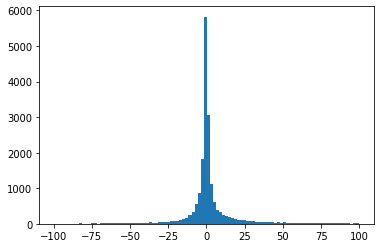

In [22]:
import matplotlib.pyplot as plt

plt.hist(test['diff'], bins=100)

In [ ]:
output_data['column_name'].plot(kind='hist', bins=10)
plt.xlabel('column_name')
plt.ylabel('Frequency')
plt.title('Histogram of column_name')
plt.show()

# Comparing Columns

In [2]:
employment_qc_data_post_qa = pd.read_csv(r'C:\Users\cra\San Diego Association of Governments\SANDAG QA QC - Documents\Projects\2023\2023-028 MGRA15 Input Table 2022\2023-028-02 [Employment]\Data\Version 2 (Post QA)\mgra15_based_input_2022_01.csv')

income_qc_data = pd.read_csv(r'C:\Users\cra\San Diego Association of Governments\SANDAG QA QC - Documents\Projects\2023\2023-028 MGRA15 Input Table 2022\2023-028-03 [Household Income]\Data\Version 1\mgra15_based_input_2022_01.csv')


In [5]:
employment_qc_data_post_qa.equals(income_qc_data)

True

In [ ]:
# distribution by households by households 
# Additional review once we have flagged the MGRAs


# Household Income Distribution

In [87]:
hh_income_dist = pd.read_excel('estimates_version_5_unpivoted_income.xlsx')
hh_income_dist

,mgra,Attribute,Households,Household Percent
0,1,i1,14,0.080460
1,1,i10,2,0.011494
2,1,i2,18,0.103448
3,1,i3,36,0.206897
4,1,i4,24,0.137931
...,...,...,...,...
243206,24321,i6,3,0.150000
243207,24321,i7,1,0.050000
243208,24321,i8,3,0.150000
243209,24321,i9,2,0.100000


In [88]:
mgra_hh = hh_income_dist[['mgra', 'Households']]
mgra_hh = mgra_hh.groupby('mgra').sum()
mgra_hh.columns = ['households']
mgra_hh

,households
mgra,
1,174
2,48
3,192
4,2
5,36
...,...
24318,46
24319,0
24320,0


In [89]:
hh_income_table = hh_income_dist.pivot_table(index='mgra', columns='Attribute', values='Household Percent')
hh_income_table

Attribute,i1,i10,i2,i3,i4,i5,i6,i7,i8,i9
mgra,,,,,,,,,,
1,0.080460,0.011494,0.103448,0.206897,0.137931,0.051724,0.258621,0.057471,0.034483,0.057471
2,0.125000,0.229167,0.125000,0.062500,0.083333,0.000000,0.166667,0.083333,0.083333,0.041667
3,0.104167,0.000000,0.208333,0.125000,0.151042,0.114583,0.171875,0.057292,0.020833,0.046875
4,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.027778,0.416667,0.000000,0.000000,0.027778,0.083333,0.083333,0.111111,0.083333,0.166667
...,...,...,...,...,...,...,...,...,...,...
24314,0.000000,0.363636,0.000000,0.000000,0.090909,0.045455,0.136364,0.136364,0.136364,0.090909
24316,0.043290,0.454545,0.025974,0.038961,0.051948,0.043290,0.043290,0.051948,0.082251,0.164502
24317,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000


In [90]:
hh_income_table['<30k'] = hh_income_table['i1'] + hh_income_table['i2']
hh_income_table['30-60k'] = hh_income_table['i3'] + hh_income_table['i4']
hh_income_table['60-100k'] = hh_income_table['i5'] + hh_income_table['i6']
hh_income_table['100-150k'] = hh_income_table['i7'] + hh_income_table['i8']
hh_income_table['150k+'] = hh_income_table['i9'] + hh_income_table['i10']

In [91]:
hh_income_table_sorted = hh_income_table[['<30k', '30-60k', '60-100k', '100-150k', '150k+']]
hh_income_table_sorted


Attribute,<30k,30-60k,60-100k,100-150k,150k+
mgra,,,,,
1,0.183908,0.344828,0.310345,0.091954,0.068966
2,0.250000,0.145833,0.166667,0.166667,0.270833
3,0.312500,0.276042,0.286458,0.078125,0.046875
4,0.000000,0.000000,0.000000,0.000000,1.000000
5,0.027778,0.027778,0.166667,0.194444,0.583333
...,...,...,...,...,...
24314,0.000000,0.090909,0.181818,0.272727,0.454545
24316,0.069264,0.090909,0.086580,0.134199,0.619048
24317,0.500000,0.000000,0.500000,0.000000,0.000000


In [94]:
hh_income_with_pop = hh_income_table_sorted.merge(mgra_hh, how='left', left_index=True, right_index=True)
hh_income_with_pop

,<30k,30-60k,60-100k,100-150k,150k+,households
mgra,,,,,,
1,0.183908,0.344828,0.310345,0.091954,0.068966,174
2,0.250000,0.145833,0.166667,0.166667,0.270833,48
3,0.312500,0.276042,0.286458,0.078125,0.046875,192
4,0.000000,0.000000,0.000000,0.000000,1.000000,2
5,0.027778,0.027778,0.166667,0.194444,0.583333,36
...,...,...,...,...,...,...
24314,0.000000,0.090909,0.181818,0.272727,0.454545,22
24316,0.069264,0.090909,0.086580,0.134199,0.619048,231
24317,0.500000,0.000000,0.500000,0.000000,0.000000,2


In [95]:
hh_income_with_pop_greater_than_40 = hh_income_with_pop[hh_income_with_pop['households'] >= 40]
hh_income_with_pop_greater_than_40

,<30k,30-60k,60-100k,100-150k,150k+,households
mgra,,,,,,
1,0.183908,0.344828,0.310345,0.091954,0.068966,174
2,0.250000,0.145833,0.166667,0.166667,0.270833,48
3,0.312500,0.276042,0.286458,0.078125,0.046875,192
7,0.046512,0.162791,0.186047,0.209302,0.395349,43
9,0.134328,0.104478,0.104478,0.235075,0.421642,268
...,...,...,...,...,...,...
24298,0.351145,0.320611,0.221374,0.076336,0.030534,131
24305,0.172727,0.181818,0.172727,0.163636,0.309091,110
24311,0.155556,0.133333,0.155556,0.155556,0.400000,45


In [96]:
hh_income_with_pop_greater_than_40_removed_pop = hh_income_with_pop_greater_than_40[['<30k', '30-60k', '60-100k', '100-150k', '150k+']]
hh_income_with_pop_greater_than_40_removed_pop

,<30k,30-60k,60-100k,100-150k,150k+
mgra,,,,,
1,0.183908,0.344828,0.310345,0.091954,0.068966
2,0.250000,0.145833,0.166667,0.166667,0.270833
3,0.312500,0.276042,0.286458,0.078125,0.046875
7,0.046512,0.162791,0.186047,0.209302,0.395349
9,0.134328,0.104478,0.104478,0.235075,0.421642
...,...,...,...,...,...
24298,0.351145,0.320611,0.221374,0.076336,0.030534
24305,0.172727,0.181818,0.172727,0.163636,0.309091
24311,0.155556,0.133333,0.155556,0.155556,0.400000


In [44]:
# Rows with a value greater than .90
dominant_rows = hh_income_with_pop_greater_than_40_removed_pop[hh_income_with_pop_greater_than_40_removed_pop.apply(lambda row: any(val >= .90 for val in row), axis=1)]
dominant_rows

,<30k,30-60k,60-100k,100-150k,150k+
mgra,,,,,
4542,0.0,0.0,0.024390,0.060976,0.914634
4543,0.0,0.0,0.032432,0.054054,0.913514
6018,0.0,0.0,0.027778,0.069444,0.902778
7496,0.0,0.0,0.025316,0.050633,0.924051
12391,0.0,0.0,0.031579,0.057895,0.910526
12392,0.0,0.0,0.033557,0.053691,0.912752
12393,0.0,0.0,0.028302,0.047170,0.924528
12394,0.0,0.0,0.033333,0.053333,0.913333
12397,0.0,0.0,0.030303,0.060606,0.909091


In [47]:
# Difference between max and min is large
diff_check = hh_income_with_pop_greater_than_40_removed_pop[hh_income_with_pop_greater_than_40_removed_pop.apply(lambda row: max(row) - min(row) >= .90, axis=1)]
diff_check

,<30k,30-60k,60-100k,100-150k,150k+
mgra,,,,,
4542,0.0,0.0,0.024390,0.060976,0.914634
4543,0.0,0.0,0.032432,0.054054,0.913514
6018,0.0,0.0,0.027778,0.069444,0.902778
7496,0.0,0.0,0.025316,0.050633,0.924051
12391,0.0,0.0,0.031579,0.057895,0.910526
12392,0.0,0.0,0.033557,0.053691,0.912752
12393,0.0,0.0,0.028302,0.047170,0.924528
12394,0.0,0.0,0.033333,0.053333,0.913333
12397,0.0,0.0,0.030303,0.060606,0.909091


# Diff Build

In [82]:
v4 = pd.read_csv(r'C:\Users\cra\San Diego Association of Governments\SANDAG QA QC - Documents\Projects\2023\2023-028 MGRA15 Input Table 2022\2023-028-02 [Employment]\Data\Version 2\mgra15_based_input_2022_01.csv')
v4 = v4.set_index('mgra')
v4 = v4.drop(['taz', 'LUZ'], axis=1)

v5 = pd.read_csv(r'C:\Users\cra\San Diego Association of Governments\SANDAG QA QC - Documents\Projects\2023\2023-028 MGRA15 Input Table 2022\2023-028-02 [Employment]\Data\Version 3\mgra15_based_input_2022_01.csv')
v5 = v5.set_index('mgra')
v5 = v5.drop(['taz', 'LUZ'], axis=1)

In [84]:
def subtract_dataframes(df1, df2):
    # Filter the second data frame to keep only rows with index values in the first data frame
    common_index = pd.merge(df1, df2, left_index=True, right_index=True)
    df1 = df1.loc[common_index.index]
    df2 = df2.loc[common_index.index]
    
    # Find the common columns between the two data frames
    common_cols = list(set(df1.columns) & set(df2.columns))
    common_cols = [x for x in df2.columns if x in common_cols]
    
    # Filter the data frames to keep only the common columns
    df1 = df1[common_cols]
    df2 = df2[common_cols]
    
    # Subtract the second data frame from the first
    result = df1.subtract(df2)
    
    return result

In [86]:
subtract_dataframes(v5, v4).to_excel('estimates_v5_minus_v4.xlsx')

In [46]:
# Check if any row has all zeroes except for one category
all_zero_rows = hh_income_with_pop_greater_than_40_removed_pop[hh_income_with_pop_greater_than_40_removed_pop.apply(lambda row: sum(val == 0 for val in row) == (hh_income_with_pop_greater_than_40_removed_pop.shape[1] - 1), axis=1)]
all_zero_rows

,<30k,30-60k,60-100k,100-150k,150k+
mgra,,,,,


# Visuals

## Less than 30k

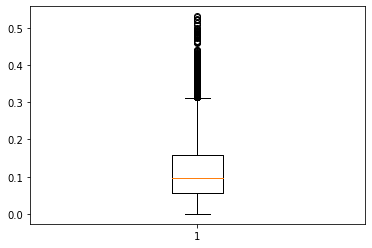

In [60]:
plt.boxplot(hh_income_with_pop_greater_than_40_removed_pop['<30k']);

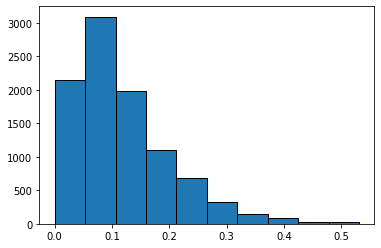

In [59]:
plt.hist(hh_income_with_pop_greater_than_40_removed_pop['<30k'], bins=10, edgecolor='black');

## 30-60k

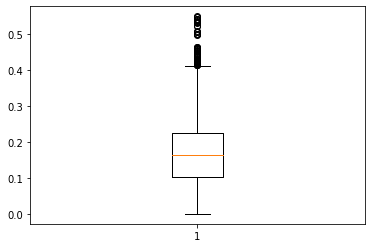

In [58]:
plt.boxplot(hh_income_with_pop_greater_than_40_removed_pop['30-60k']);

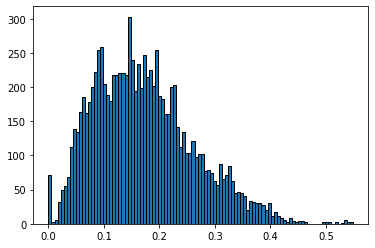

In [57]:
plt.hist(hh_income_with_pop_greater_than_40_removed_pop['30-60k'], bins=100, edgecolor='black');

## 60 - 100k

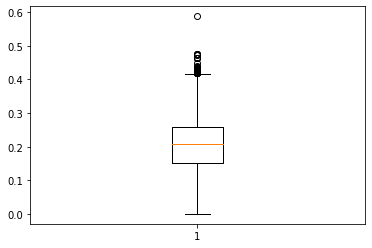

In [61]:
plt.boxplot(hh_income_with_pop_greater_than_40_removed_pop['60-100k']);

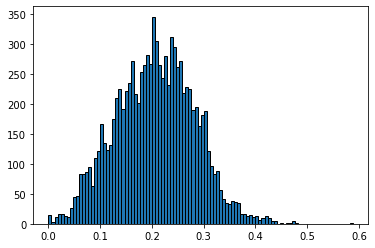

In [62]:
plt.hist(hh_income_with_pop_greater_than_40_removed_pop['60-100k'], bins=100, edgecolor='black');

## 100-150k

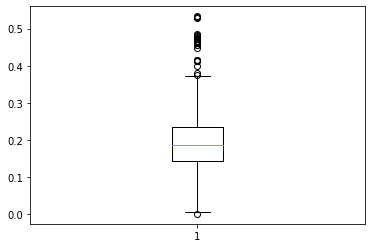

In [63]:
plt.boxplot(hh_income_with_pop_greater_than_40_removed_pop['100-150k']);

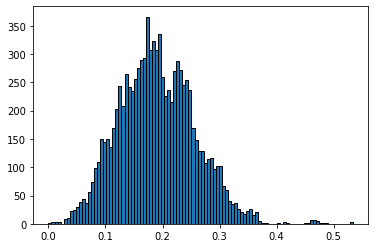

In [64]:
plt.hist(hh_income_with_pop_greater_than_40_removed_pop['100-150k'], bins=100, edgecolor='black');

## 105k+

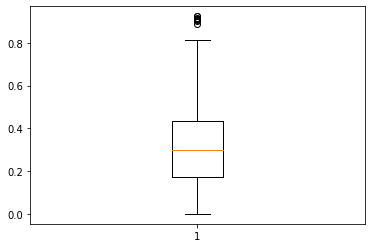

In [65]:
plt.boxplot(hh_income_with_pop_greater_than_40_removed_pop['150k+']);

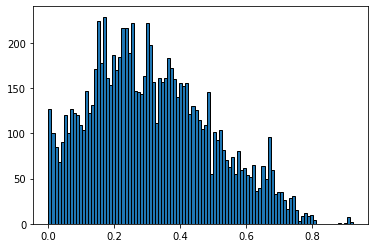

In [66]:
plt.hist(hh_income_with_pop_greater_than_40_removed_pop['150k+'], bins=100, edgecolor='black');

## Combination Graphs

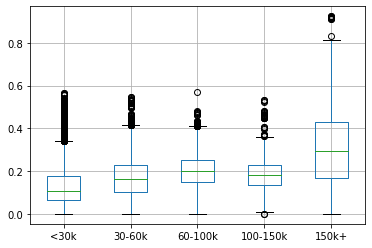

In [97]:
hh_income_with_pop_greater_than_40_removed_pop.boxplot();

In [99]:
tails_output = hh_income_with_pop_greater_than_40_removed_pop[['<30k', '150k+']]

tails_output[((tails_output['<30k'] > .3) | (tails_output['150k+'] > .8))]#.to_excel('upper_tails_for_both_under30k_and_over150k_v5.xlsx')

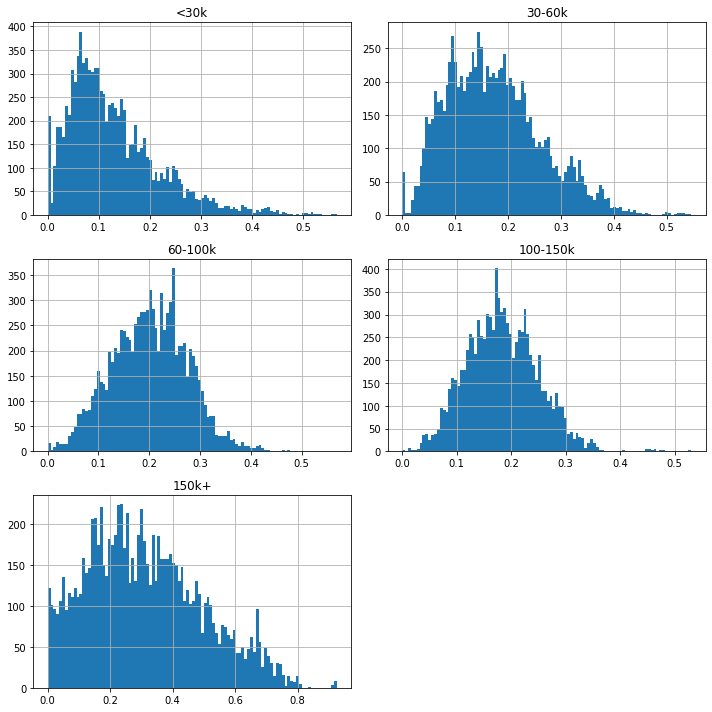

In [100]:
hh_income_with_pop_greater_than_40_removed_pop.hist(bins=100, figsize=(10, 10))
plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()

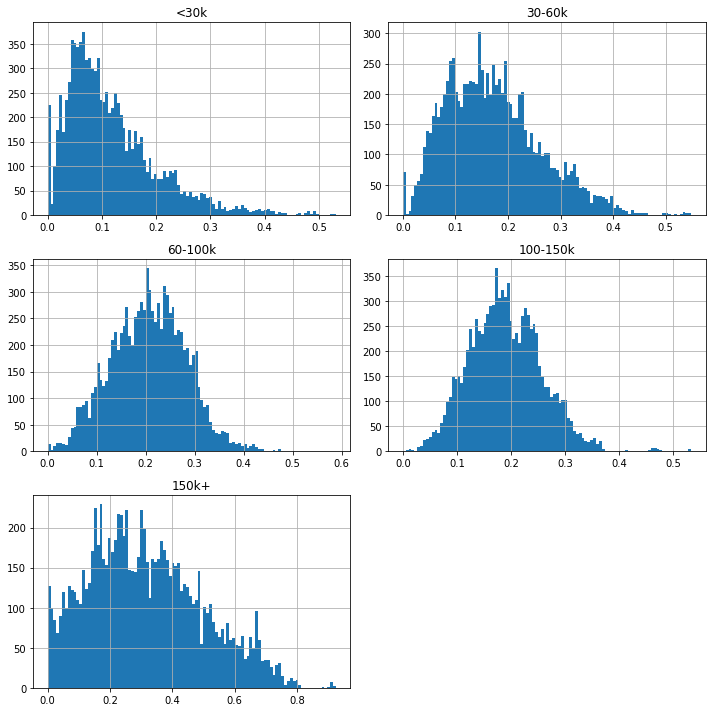

In [70]:
hh_income_with_pop_greater_than_40_removed_pop.hist(bins=100, figsize=(10, 10))
plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()

In [50]:
hh_income_with_pop_greater_than_40_removed_pop['<30k']

mgra
1        0.166667
2        0.208333
3        0.286458
7        0.023256
9        0.123134
           ...   
24298    0.328244
24305    0.154545
24311    0.133333
24316    0.056277
24318    0.108696
Name: <30k, Length: 9608, dtype: float64

In [28]:
hh_income_with_pop.columns

Index(['<30k', '30-60k', '60-100k', '100-150k', '150k+', 'households'], dtype='object')

In [27]:
greater_than_40_distribution.to_excel('greater_than_40_distribution.xlsx')

In [23]:
hh_income_with_pop.describe()

,<30k,30-60k,60-100k,100-150k,150k+,households
count,18473.000000,18473.000000,18473.000000,18473.000000,18473.000000,18473.000000
mean,0.113322,0.166821,0.206340,0.183221,0.330296,62.819899
std,0.122458,0.121480,0.130666,0.096347,0.217070,73.753850
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.035714,0.087302,0.136986,0.131498,0.166667,18.000000
50%,0.085271,0.153846,0.200000,0.181818,0.310345,42.000000
75%,0.157360,0.225806,0.258065,0.235294,0.470588,82.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2381.000000
